# The CNN CADe_v2Inputs Notebook

##### This notebook creates a deep learning classification model that reads images from a dataset and determines if any cancer pathology is present or not.   
##### It takes two inputs, cc and mlo view images, and trains on both of them for each patient.
##### The cc and mlo view images are seen as a set and although there are 404 images tested, the support will indicate 202.
##### This is due to the fact that it is seen as sets.

## Import the Relevant Libraries

In [1]:
# TensorFlow is a library containing multiple machine learning tasks
import tensorflow as tf

In [2]:
# Keras, a high-level neural networks API, that runs on top of TensorFlow
# Enables building deep neural networks
from tensorflow import keras

In [3]:
# Check what device is in use – CPU or GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9359004595667125534
xla_global_id: -1
]


In [4]:
# Print the versions
print("\033[1m" + "\033[4m" + "Versions in Use" + "\033[0;0m") 
print("TensorFlow: ", tf.__version__)
print("Keras: ", keras.__version__)

Versions in Use
TensorFlow:  2.12.0
Keras:  2.12.0


In [5]:
# Import the backend module from TensorFlow's Keras API and aliases it as K
from tensorflow.keras import backend as K

In [6]:
# Ensure the Keras session are cleared
K.clear_session()

In [7]:
# Used to instantiate a Keras tensor
from keras import Input

In [8]:
# Layers are the basic building blocks of neural networks in Keras
from keras import layers

In [9]:
# Allows for creation of neural network models
from keras.models import Model

In [10]:
# Allows for setting the kernel initializer used
from tensorflow.keras.initializers import GlorotUniform, HeNormal

In [11]:
# Allows for generation of tf.data.Dataset from image files in a directory
from tensorflow.keras.utils import image_dataset_from_directory

In [12]:
# Allows for implementation of the AdamW optimizer - the chosen optimizer for my model 
from tensorflow.keras.optimizers import AdamW

In [13]:
# Allows for implementation of early stopping in callbacks
from keras.callbacks import EarlyStopping

In [14]:
# Allows for implementation of reduce learning rate on plateau in callbacks
from keras.callbacks import ReduceLROnPlateau

In [15]:
# Allows for implementation of model check points in callbacks
from keras.callbacks import ModelCheckpoint

In [16]:
# Allows for implementation of TensorBoard in callbacks
from keras.callbacks import TensorBoard

In [17]:
# Allows for implementation of LearningRateScheduler in callbacks
from keras.callbacks import LearningRateScheduler

In [18]:
# Needed for TensorBoard 
import datetime

In [19]:
# Allows for the computation of the cross-entropy loss between true labels and predicted labels
from keras import losses

In [20]:
# Allows for judging the performance of the model
from keras import metrics

In [21]:
# Allows for defining a parallel dataset using Python code
from tensorflow.keras.utils import Sequence

In [22]:
# Allows for loading already trained models
from tensorflow.keras.models import load_model

In [23]:
# Allows for plotting of figures 
import matplotlib.pyplot as plt

In [24]:
# Allows for plotting of confusion matrix heatmap 
import seaborn as sns

In [25]:
# Allows for creating of classification report and confusion matrix  
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Allows for the use of np.concatenate for the y-true values
import numpy as np

## Variables in Use

In [27]:
# Define image width and height
size_w = 256
size_h = 256

# Define the batch size used
bch_size = 8

# Define seed used for shuffle
shuf_seed = 7

# Define the interpolation used
inter_pol = "lanczos5"

# Define the kernel initializers used
kernel_init_default_1 = HeNormal(seed = 3)                         # Convolutional layers
kernel_init_default_2 = GlorotUniform(seed = 3)                    # Dense layers

## Creating the Model with Keras API

In [28]:
# Input CC view
input_cc = Input(shape = (size_h, size_w, 1), name = "input_cc")

# Rescale
image_rescale_cc = layers.Rescaling(scale = 1./255, name = "image_rescale_cc")(input_cc)


# ..............................................
# First convolutional layer
conv_1_cc = layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                          padding = "same", name = "conv_1_cc", kernel_initializer = kernel_init_default_1)(image_rescale_cc)
conv_1_cc = layers.BatchNormalization(name = "bn_1_cc")(conv_1_cc)

max_1_cc = layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = "max_1_cc")(conv_1_cc)


# ..............................................
# Second convolutional layer
conv_2_cc_1 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                            padding = "same", name = "conv_2_cc_1", kernel_initializer = kernel_init_default_1)(max_1_cc)
conv_2_cc_1 = layers.BatchNormalization(name = "bn_2_cc_1")(conv_2_cc_1)

conv_2_cc_2 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                            padding = "same", name = "conv_2_cc_2", kernel_initializer = kernel_init_default_1)(conv_2_cc_1)
conv_2_cc_2 = layers.BatchNormalization(name = "bn_2_cc_2")(conv_2_cc_2)

conv_2_cc = layers.Add(name = "add_1_cc")([conv_2_cc_1, conv_2_cc_2])

max_2_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_2_cc")(conv_2_cc) 


# ..............................................
# Third convolutional layer
conv_3_cc_1 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                            padding = "same", name = "conv_3_cc_1", kernel_initializer = kernel_init_default_1)(max_2_cc)
conv_3_cc_1 = layers.BatchNormalization(name = "bn_3_cc_1")(conv_3_cc_1)

conv_3_cc_2 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1),
                            padding = "same", name = "conv_3_cc_2", kernel_initializer = kernel_init_default_1)(conv_3_cc_1)
conv_3_cc_2 = layers.BatchNormalization(name = "bn_3_cc_2")(conv_3_cc_2)

conv_3_cc = layers.Add(name = "add_2_cc")([conv_3_cc_1, conv_3_cc_2])

max_3_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_3_cc")(conv_3_cc)


# ..............................................
# Fourth convolutional layer
conv_4_cc_1 = layers.Conv2D(128, kernel_size = (5, 5), activation = "relu", strides = (2, 2), 
                            padding = "same", name = "conv_4_cc_1", kernel_initializer = kernel_init_default_1)(max_3_cc)
conv_4_cc_1 = layers.BatchNormalization(name = "bn_4_cc_1")(conv_4_cc_1)

conv_4_cc_2 = layers.Conv2D(128, kernel_size = (5, 5), activation = "relu", strides = (1, 1), 
                            padding = "same", name = "conv_4_cc_2", kernel_initializer = kernel_init_default_1)(conv_4_cc_1)
conv_4_cc_2 = layers.BatchNormalization(name = "bn_4_cc_2")(conv_4_cc_2)

conv_4_cc = layers.Add(name = "add_3_cc")([conv_4_cc_1, conv_4_cc_2])

max_4_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_4_cc")(conv_4_cc)


# ..............................................
# Fifth convolutional layer
conv_5_cc_1 = layers.Conv2D(256, kernel_size = (5, 5), activation = "relu", strides = (2, 2), 
                            padding = "same", name = "conv_5_cc_1", kernel_initializer = kernel_init_default_1)(max_4_cc)
conv_5_cc_1 = layers.BatchNormalization(name = "bn_5_cc_1")(conv_5_cc_1)

conv_5_cc_2 = layers.Conv2D(256, kernel_size = (5, 5), activation = "relu", strides = (1, 1), 
                            padding = "same", name = "conv_5_cc_2", kernel_initializer = kernel_init_default_1)(conv_5_cc_1)
conv_5_cc_2 = layers.BatchNormalization(name = "bn_5_cc_2")(conv_5_cc_2)

conv_5_cc = layers.Add(name = "add_4_cc")([conv_5_cc_1, conv_5_cc_2])

max_5_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_5_cc")(conv_5_cc)




# -----------------------------------------------------------------------------------------------------------------
# Input MLO view
input_mlo = Input(shape = (size_h, size_w, 1), name = "input_mlo")

# Rescale
image_rescale_mlo = layers.Rescaling(scale = 1./255, name = "image_rescale_mlo")(input_mlo)


# ..............................................
# First convolutional layer
conv_1_mlo = layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                           padding = "same", name = "conv_1_mlo", kernel_initializer = kernel_init_default_1)(image_rescale_mlo)
conv_1_mlo = layers.BatchNormalization(name = "bn_1_mlo")(conv_1_mlo)

max_1_mlo = layers.MaxPooling2D((3, 3), strides = (2, 2), padding = "same", name = "max_1_mlo")(conv_1_mlo)


# ..............................................
# Second convolutional layer
conv_2_mlo_1 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                             padding = "same", name = "conv_2_mlo_1", kernel_initializer = kernel_init_default_1)(max_1_mlo)
conv_2_mlo_1 = layers.BatchNormalization(name = "bn_2_mlo_1")(conv_2_mlo_1)

conv_2_mlo_2 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                             padding = "same", name = "conv_2_mlo_2", kernel_initializer = kernel_init_default_1)(conv_2_mlo_1)
conv_2_mlo_2 = layers.BatchNormalization(name = "bn_2_mlo_2")(conv_2_mlo_2)

conv_2_mlo = layers.Add(name = "add_1_mlo")([conv_2_mlo_1, conv_2_mlo_2])

max_2_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_2_mlo")(conv_2_mlo)


# ..............................................
# Third convolutional layer
conv_3_mlo_1 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), 
                             padding = "same", name = "conv_3_mlo_1", kernel_initializer = kernel_init_default_1)(max_2_mlo)
conv_3_mlo_1 = layers.BatchNormalization(name = "bn_3_mlo_1")(conv_3_mlo_1)

conv_3_mlo_2 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1),
                             padding = "same", name = "conv_3_mlo_2", kernel_initializer = kernel_init_default_1)(conv_3_mlo_1)
conv_3_mlo_2 = layers.BatchNormalization(name = "bn_3_mlo_2")(conv_3_mlo_2)

conv_3_mlo = layers.Add(name = "add_2_mlo")([conv_3_mlo_1, conv_3_mlo_2])

max_3_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_3_mlo")(conv_3_mlo)


# ..............................................
# Fourth convolutional layer
conv_4_mlo_1 = layers.Conv2D(128, kernel_size = (5, 5), activation = "relu", strides = (2, 2), 
                             padding = "same", name = "conv_4_mlo_1", kernel_initializer = kernel_init_default_1)(max_3_mlo)
conv_4_mlo_1 = layers.BatchNormalization(name = "bn_4_mlo_1")(conv_4_mlo_1)

conv_4_mlo_2 = layers.Conv2D(128, kernel_size = (5, 5), activation = "relu", strides = (1, 1), 
                             padding = "same", name = "conv_4_mlo_2", kernel_initializer = kernel_init_default_1)(conv_4_mlo_1)
conv_4_mlo_2 = layers.BatchNormalization(name = "bn_4_mlo_2")(conv_4_mlo_2)

conv_4_mlo = layers.Add(name = "add_3_mlo")([conv_4_mlo_1, conv_4_mlo_2])

max_4_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_4_mlo")(conv_4_mlo)


# ..............................................
# Fifth convolutional layer
conv_5_mlo_1 = layers.Conv2D(256, kernel_size = (5, 5), activation = "relu", strides = (2, 2), 
                             padding = "same", name = "conv_5_mlo_1", kernel_initializer = kernel_init_default_1)(max_4_mlo)
conv_5_mlo_1 = layers.BatchNormalization(name = "bn_5_mlo_1")(conv_5_mlo_1)

conv_5_mlo_2 = layers.Conv2D(256, kernel_size = (5, 5), activation = "relu", strides = (1, 1), 
                             padding = "same", name = "conv_5_mlo_2", kernel_initializer = kernel_init_default_1)(conv_5_mlo_1)
conv_5_mlo_2 = layers.BatchNormalization(name = "bn_5_mlo_2")(conv_5_mlo_2)

conv_5_mlo = layers.Add(name = "add_4_mlo")([conv_5_mlo_1, conv_5_mlo_2])

max_5_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_5_mlo")(conv_5_mlo)




# -----------------------------------------------------------------------------------------------------------------
# Flattening layers
# Flattening layer - CC View
flat_cc = layers.Flatten(name = "flatten_cc")(max_5_cc)


# Flattening layer - MLO View
flat_mlo = layers.Flatten(name = "flatten_mlo")(max_5_mlo)




# -----------------------------------------------------------------------------------------------------------------
# Combine the output of the two branches
combined = layers.Concatenate(axis = 1, name = "combine")([flat_cc, flat_mlo])




# -----------------------------------------------------------------------------------------------------------------
# Add a classifier
# Dense 1 layer
den_1 = layers.Dense(512, activation = "relu", name = "dense_1", kernel_initializer = kernel_init_default_2)(combined)

# BatchNormalization 1 Layer
bn_den_1 = layers.BatchNormalization(name = "bn_den_1")(den_1)

# Dropout 1 Layer
drop_1 = layers.Dropout(0.4, name = "drop_out_1")(bn_den_1)


# Dense 2 layer
den_2 = layers.Dense(256, activation = "relu", name = "dense_2", kernel_initializer = kernel_init_default_2)(drop_1)

# BatchNormalization 1 Layer
bn_den_2 = layers.BatchNormalization(name = "bn_den_2")(den_2)

# Dropout 2 Layer
drop_2 = layers.Dropout(0.4, name = "drop_out_2")(bn_den_2)


# Dense 3 layer
den_3 = layers.Dense(128, activation = "relu", name = "dense_3", kernel_initializer = kernel_init_default_2)(drop_2)

# BatchNormalization 3 Layer
bn_den_3 = layers.BatchNormalization(name = "bn_den_3")(den_3)

# Dropout 3 Layer
drop_3 = layers.Dropout(0.3, name = "drop_out_3")(bn_den_3)


# Output layer
out = layers.Dense(1, activation = "sigmoid", name = "output", kernel_initializer = kernel_init_default_2)(drop_3)



# -----------------------------------------------------------------------------------------------------------------
# Define the model
model_v_d154 = Model(inputs = [input_cc, input_mlo], outputs = out, name = "CADe_v2Inputs")

## Display the Architecture of the Convnet

  - By printing the summary of the CNN.
  - By using the plot_model function and saving the model as a png image.

In [29]:
# Print out the summary of the model
model_v_d154.summary()

Model: "CADe_v2Inputs"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_cc (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_mlo (InputLayer)         [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 image_rescale_cc (Rescaling)   (None, 256, 256, 1)  0           ['input_cc[0][0]']               
                                                                                      

In [30]:
# Set the png dot image file's path
dot_img_file = "logs_graph/model_v_d154.png"

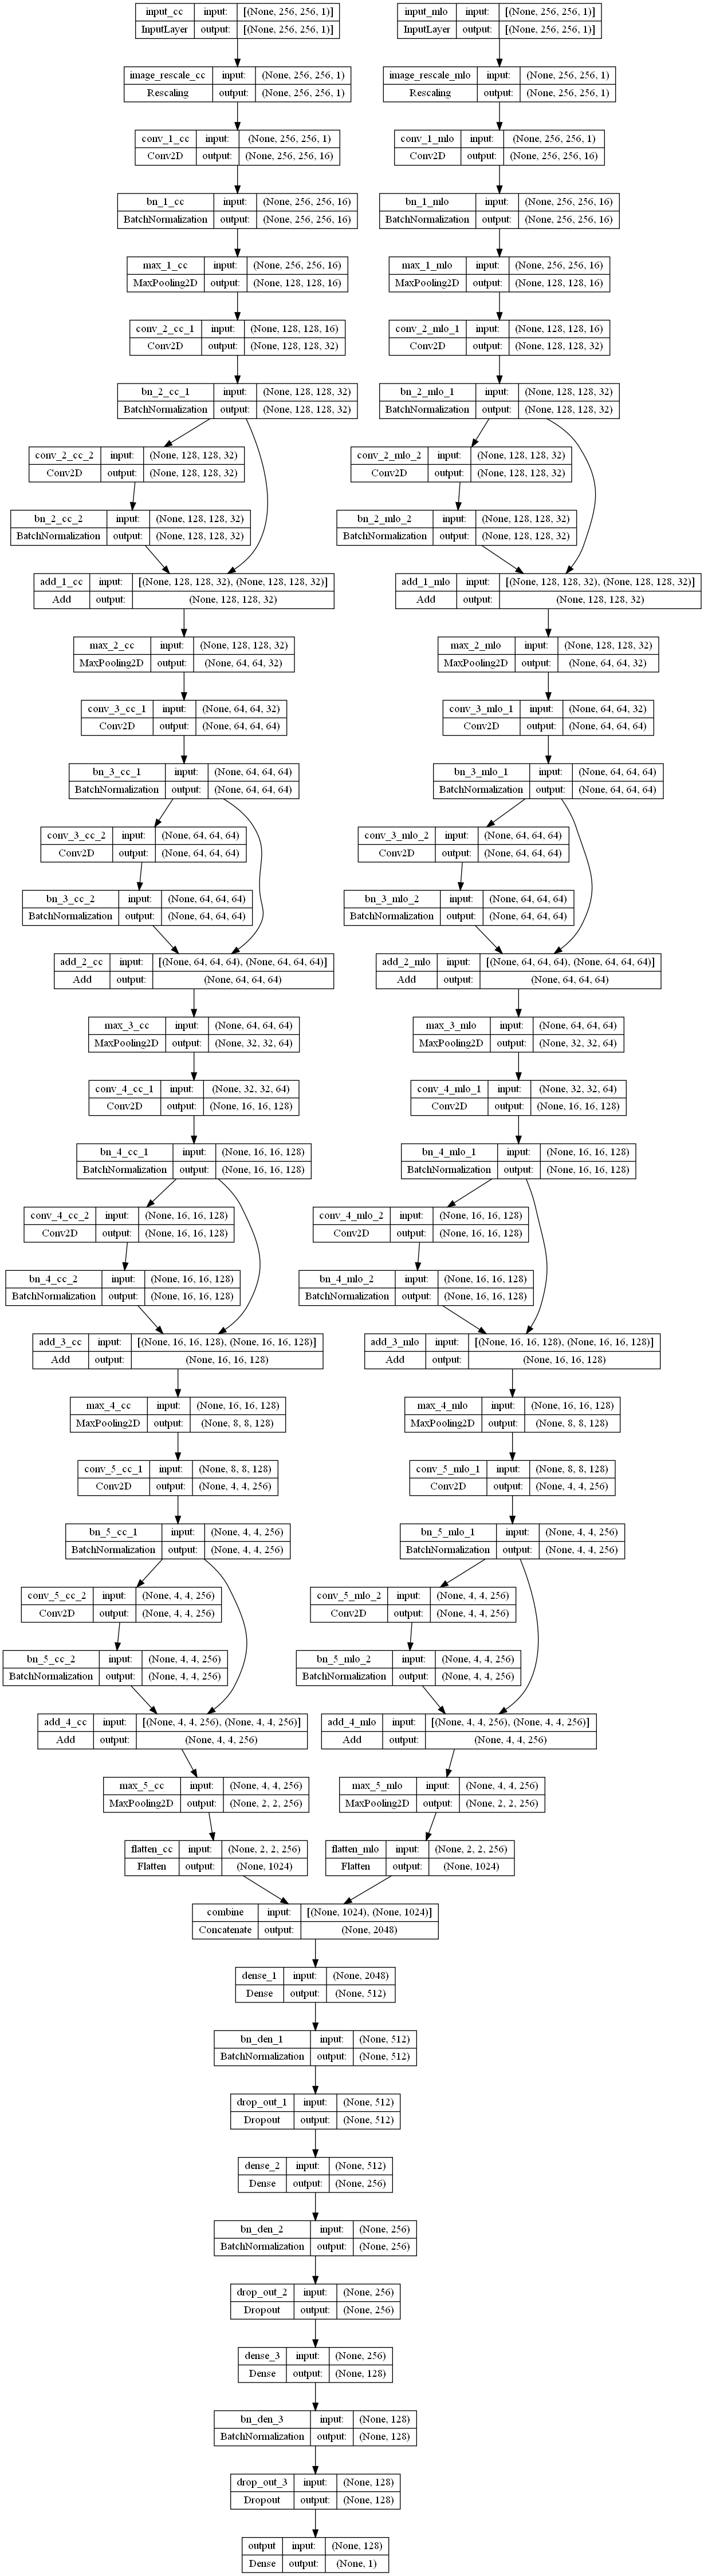

In [31]:
tf.keras.utils.plot_model(model_v_d154, to_file = dot_img_file, show_shapes = True, rankdir = "TB")

## Define Directory Paths
- train_path contains the training images.
- validation_path contains the validation images.
- test_path contains the testing images.
- Split ratio are:
    * Training: 75%
    * Validation: 15%
    * Testing: 10%

In [32]:
# CC View
train_path_cc = "RSNA_PNG_Mammograms_Split/train_img/cc/"
validation_path_cc = "RSNA_PNG_Mammograms_Split/val_img/cc/"
test_path_cc = "RSNA_PNG_Mammograms_Split/test_img/cc/"

# MLO View
train_path_mlo = "RSNA_PNG_Mammograms_Split/train_img/mlo/"
validation_path_mlo = "RSNA_PNG_Mammograms_Split/val_img/mlo/"
test_path_mlo = "RSNA_PNG_Mammograms_Split/test_img/mlo/"

## Using Image Dataset From Directory to Read Images from Directories

In [33]:
# Create a generator for the training images - cc view
train_generator_cc = image_dataset_from_directory(train_path_cc,
                                                  shuffle = True,
                                                  seed = shuf_seed,
                                                  image_size = (size_h, size_w), 
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [34]:
# Create a generator for the training images - mlo view
train_generator_mlo = image_dataset_from_directory(train_path_mlo,
                                                   shuffle = True,
                                                   seed = shuf_seed,
                                                   image_size = (size_h, size_w), 
                                                   interpolation = inter_pol,
                                                   color_mode = "grayscale",
                                                   batch_size = bch_size,
                                                   label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [35]:
# Create a generator for the validation images - cc view
validation_generator_cc = image_dataset_from_directory(validation_path_cc, 
                                                       shuffle = False,
                                                       image_size = (size_h, size_w),
                                                       interpolation = inter_pol,
                                                       color_mode = "grayscale",
                                                       batch_size = bch_size,
                                                       label_mode = "binary")

Found 300 files belonging to 2 classes.


In [36]:
# Create a generator for the validation images - mlo view
validation_generator_mlo = image_dataset_from_directory(validation_path_mlo, 
                                                        shuffle = False,
                                                        image_size = (size_h, size_w),
                                                        interpolation = inter_pol,
                                                        color_mode = "grayscale",
                                                        batch_size = bch_size,
                                                        label_mode = "binary")

Found 300 files belonging to 2 classes.


In [37]:
# Create a generator for the testing images - cc view
test_generator_cc = image_dataset_from_directory(test_path_cc, 
                                                 shuffle = False,
                                                 image_size = (size_h, size_w),
                                                 interpolation = inter_pol,
                                                 color_mode = "grayscale",
                                                 batch_size = bch_size,
                                                 label_mode = "binary")

Found 202 files belonging to 2 classes.


In [38]:
# Create a generator for the testing images - mlo view
test_generator_mlo = image_dataset_from_directory(test_path_mlo, 
                                                  shuffle = False,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 202 files belonging to 2 classes.


## Inspect the Data

Class names - cc view:  ['cancer', 'no_cancer']
Data batch shape: (8, 256, 256, 1)
Labels batch shape: (8, 1)
Label dtype: <dtype: 'float32'>
Labels: [1.] [1.] [0.] [1.] [0.] [0.] [0.] [0.] 

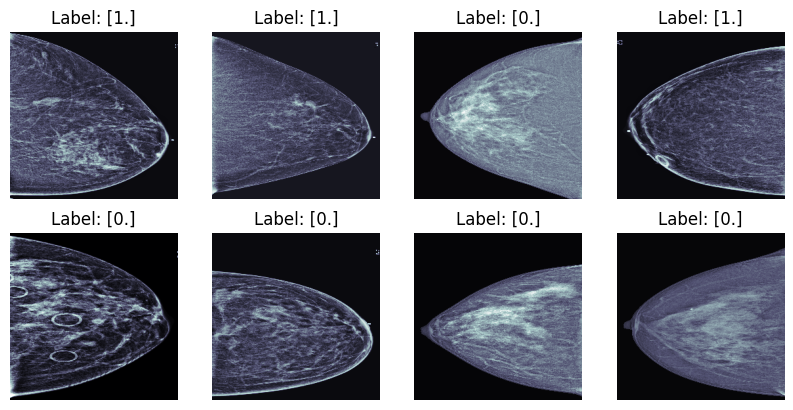

Class names - mlo view:  ['cancer', 'no_cancer']
Data batch shape: (8, 256, 256, 1)
Labels batch shape: (8, 1)
Label dtype: <dtype: 'float32'>
Labels: [1.] [1.] [0.] [1.] [0.] [0.] [0.] [0.] 

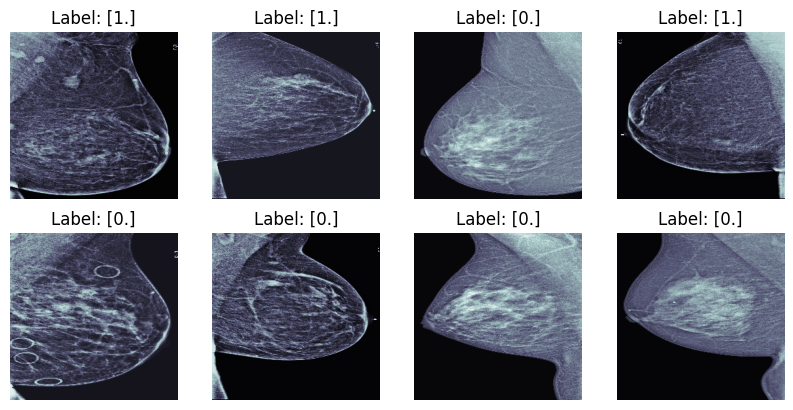

In [39]:
# Function to inspect a batch of images and labels from a generator
def inspect_data(generator, num_batches = 1):
    # Loop over the specified number of batches in the generator (default is 1)
    for images, labels in generator.take(num_batches):
        # Print the shape of the images and labels tensors
        print("Data batch shape:", images.shape)                            # Shape of image data (batch_size, height, width, channels)
        print("Labels batch shape:", labels.shape)                          # Shape of label data 
        print("Label dtype:", labels.dtype)                                 # Data type of the labels (usually integer or float)
        print("Labels:", end = " ")                                         
        for label in labels.numpy():                                        # Convert the labels to numpy and print them
            print(label, end = " ")                                         # In a single line separated by spaces
       
        # Plot the images in a grid using matplotlib
        plt.figure(figsize = (10, 10))                                      # Define the figure size
        for i in range(len(images)):
            ax = plt.subplot(4, 4, i + 1)                                   # Create a subplot grid with 4 rows and 4 columns
            plt.imshow(images[i].numpy().squeeze(), cmap = "bone")          # Plot the image with 'bone' colormap, often used for medical images
            plt.title(f"Label: {labels[i].numpy()}")                        # Set the title to show the corresponding label
            plt.axis("off")                                                 # Hide the axis for better visualization
        plt.show()                                                          # Display the plot



# -----------------------------------------------------------------------------------------------------------------
# Print the class names for the cc (craniocaudal) mammogram generator
print("Class names - cc view: ", train_generator_cc.class_names)

# Call the inspect_data function - view images and labels from the cc view generator
inspect_data(train_generator_cc)


# Print the class names for the mlo (mediolateral oblique) mammogram generator
print("Class names - mlo view: ", train_generator_mlo.class_names)

# Call the inspect_data function - view images and labels from the mlo view generator
inspect_data(train_generator_mlo)

## Early Stopping
Interrupting training when the validation loss is no longer improving.

In [40]:
# Create the early stopping callback
early_stop = EarlyStopping(monitor = "val_AUC_ROC", 
                           patience = 18, 
                           restore_best_weights = True, 
                           verbose = 1)

## Reduce Learning Rate on Plateau
Reduce learning rate when a metric has stopped improving.

In [41]:
reduce_lr = ReduceLROnPlateau(monitor = "val_AUC_ROC",
                              factor = 0.2,
                              patience = 9, 
                              min_lr = 6e-9, 
                              verbose = 1)

## Model Checkpoint
Save the current weights of the model at different points during training.

In [42]:
# Create the model check callback
model_check = ModelCheckpoint(filepath = "logs_model/model_v_d154.keras",
                              monitor = "val_loss",
                              save_best_only = True)

## TensorBoard 
TensorBoard provides the visualization and tooling.

In [43]:
file_name = "model_v_d154"

In [44]:
tensorboard_callback = TensorBoard(log_dir = "logs_tensorboard/{}".format(file_name), histogram_freq = 1)

## Configuring the Model

#### Loss
The loss used:
  - BinaryCrossentropy, is used for binary (0 or 1) classification applications and computes the cross-entropy loss between true labels and predicted labels.
  - The from_logits = False, indicates that the predicted value is of a value between [0., 1.].
  - label_smoothing of 0.2 allows for ...

#### Optimizer
The optimizer used:
  - AdamW, a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights
  - Using exponential moving average (EMA) for the weights of the model with added momentum when computing the EMA of the model's weights...

#### Metrics
The metrics used:
  - BinaryAccuracy
  - Precision
  - Recall
  - AUC ROC curve

In [45]:
# Compile the model
model_v_d154.compile(loss = losses.BinaryCrossentropy(from_logits = False,
                                                      label_smoothing = 0.2),
                     optimizer = AdamW(
                         learning_rate = 1e-3,
                         weight_decay = 0.0004,
                         use_ema = True,
                         ema_momentum = 0.6),
                     metrics = [metrics.BinaryAccuracy(name = "accuracy"),
                                metrics.Precision(name = "precision"),
                                metrics.Recall(name = "recall"),
                                metrics.AUC(name = "AUC_ROC", curve = "ROC")])

## To Prevent the Following

- Mismatch found in batch 0- Labels cc view: [[0.] [0.] [0.] [0.] [1.] [0.] [0.] [0.]]
- Labels mlo view: [[0.] [0.] [0.] [1.] [0.] [1.] [0.] [0.]]

#### Please rerun the following generator cells.

In [46]:
# Create a generator for the training images - cc view
train_generator_cc = image_dataset_from_directory(train_path_cc,
                                                  shuffle = True,
                                                  seed = shuf_seed,
                                                  image_size = (size_h, size_w), 
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [47]:
# Create a generator for the training images - mlo view
train_generator_mlo = image_dataset_from_directory(train_path_mlo,
                                                   shuffle = True,
                                                   seed = shuf_seed,
                                                   image_size = (size_h, size_w), 
                                                   interpolation = inter_pol,
                                                   color_mode = "grayscale",
                                                   batch_size = bch_size,
                                                   label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [48]:
# Create a generator for the validation images - cc view
validation_generator_cc = image_dataset_from_directory(validation_path_cc, 
                                                       shuffle = False,
                                                       image_size = (size_h, size_w),
                                                       interpolation = inter_pol,
                                                       color_mode = "grayscale",
                                                       batch_size = bch_size,
                                                       label_mode = "binary")

Found 300 files belonging to 2 classes.


In [49]:
# Create a generator for the validation images - mlo view
validation_generator_mlo = image_dataset_from_directory(validation_path_mlo, 
                                                        shuffle = False,
                                                        image_size = (size_h, size_w),
                                                        interpolation = inter_pol,
                                                        color_mode = "grayscale",
                                                        batch_size = bch_size,
                                                        label_mode = "binary")

Found 300 files belonging to 2 classes.


In [50]:
# Create a generator for the testing images - cc view
test_generator_cc = image_dataset_from_directory(test_path_cc, 
                                                 shuffle = False,
                                                 image_size = (size_h, size_w),
                                                 interpolation = inter_pol,
                                                 color_mode = "grayscale",
                                                 batch_size = bch_size,
                                                 label_mode = "binary")

Found 202 files belonging to 2 classes.


In [51]:
# Create a generator for the testing images - mlo view
test_generator_mlo = image_dataset_from_directory(test_path_mlo, 
                                                  shuffle = False,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 202 files belonging to 2 classes.


## Training the Model
##### Before training of the model can commence, the data for the dual input model must be generated per batch.
##### This is achieved by the double_generator class, which ensures that both the cc and mlo views of each correlating patient are fed into the CADe model.

In [52]:
class double_generator(Sequence):
    # -----------------------------------------------------------------------------------------------------------------
    def __init__(self, dataset_cc, dataset_mlo, batch_size):
        # Initialize the generator with two datasets: craniocaudal (cc) and mediolateral oblique (mlo) views
        self.dataset_cc = dataset_cc
        self.dataset_mlo = dataset_mlo
        self.batch_size = batch_size

        # Convert the datasets into a list of numpy arrays for easy access to batches
        self.cc_batches = list(dataset_cc.as_numpy_iterator())
        self.mlo_batches = list(dataset_mlo.as_numpy_iterator())


    # -----------------------------------------------------------------------------------------------------------------
    def __len__(self):
        # Determine the length of the generator (number of batches) by the smaller dataset size
        return min(len(self.cc_batches), len(self.mlo_batches))


    # -----------------------------------------------------------------------------------------------------------------
    def __getitem__(self, idx):
        # Retrieve a batch from both the cc and mlo datasets by index
        batch_cc = self.cc_batches[idx]
        batch_mlo = self.mlo_batches[idx]

        # Extract images and labels from the batch of cc and mlo views
        images_cc, labels_cc = batch_cc
        images_mlo, labels_mlo = batch_mlo
        
        # Debugging: Print the labels for both views if they do not match, to catch any issues
        if not np.array_equal(labels_cc, labels_mlo):
            print(f"Mismatch found in batch {idx}")
            print(f"Labels cc view: {labels_cc}")
            print(f"Labels mlo view: {labels_mlo}")

        
        # Ensure that the labels for both views match, since they should correspond to the same case
        assert np.array_equal(labels_cc, labels_mlo), "Labels do not match between datasets"


        # Convert the images and labels to TensorFlow tensors, which is the expected format for model input
        images_cc = tf.convert_to_tensor(images_cc, dtype = tf.float32)
        images_mlo = tf.convert_to_tensor(images_mlo, dtype = tf.float32)
        labels_cc = tf.convert_to_tensor(labels_cc, dtype = tf.float32)

        
        # Return a tuple: list of images for both cc and mlo views, and labels from the cc view, which is the same as mlo's
        return [images_cc, images_mlo], labels_cc

In [53]:
# Training data
# Combining two separate training data generators (cc and mlo views) into a single generator
train_generator = double_generator(train_generator_cc, train_generator_mlo, bch_size)

# Validation data
# Combining two separate validation data generators (cc and mlo views) into a single generator
validation_generator = double_generator(validation_generator_cc, validation_generator_mlo, bch_size)

In [54]:
# Fit the model
history = model_v_d154.fit(train_generator,
                           epochs = 12,
                           batch_size = bch_size, 
                           validation_data = validation_generator,
                           validation_batch_size = bch_size,
                           callbacks = [early_stop, 
                                        reduce_lr,
                                        model_check, 
                                        tensorboard_callback])

Epoch 1/12
189/189 [==============================] - 126s 635ms/step - loss: 0.8636 - accuracy: 0.5535 - precision: 0.5388 - recall: 0.5343 - AUC_ROC: 0.5702 - val_loss: 0.8378 - val_accuracy: 0.5167 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC_ROC: 0.5097 - lr: 0.0010
Epoch 2/12
189/189 [==============================] - 118s 626ms/step - loss: 0.7754 - accuracy: 0.5548 - precision: 0.5394 - recall: 0.5453 - AUC_ROC: 0.5703 - val_loss: 0.9005 - val_accuracy: 0.5800 - val_precision: 0.7111 - val_recall: 0.2207 - val_AUC_ROC: 0.5761 - lr: 0.0010
Epoch 3/12
189/189 [==============================] - 118s 626ms/step - loss: 0.7130 - accuracy: 0.5847 - precision: 0.5710 - recall: 0.5687 - AUC_ROC: 0.6374 - val_loss: 0.8858 - val_accuracy: 0.5267 - val_precision: 0.7143 - val_recall: 0.0345 - val_AUC_ROC: 0.6771 - lr: 0.0010
Epoch 4/12
189/189 [==============================] - 119s 628ms/step - loss: 0.6819 - accuracy: 0.6419 - precision: 0.6329 - recall: 0.6181 - AUC_RO

## Call the Tensorboard

#### By using the following commands in the Anaconda Prompt(mini):
- conda activate tensorflowIO- cd C:\Users\miche\Desktop\CM3070 Final Project Code- tensorboard --logdir logs_tensorboard/model_v_d154

## Save the Model

In [55]:
# Save model
model_v_d154.save("logs_model/model_v_d154.h5")

## Evaluate using Accuracy, Loss and AUC on Training and Validation Data

In [56]:
# Print the history parameters 
print(history.params)

{'verbose': 1, 'epochs': 12, 'steps': 189}


In [57]:
# Print the history keys used
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'AUC_ROC', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_AUC_ROC', 'lr'])


In [58]:
# Use the history keys and assign them to variables 
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

precision = history.history["precision"]
val_precision = history.history["val_precision"]

recall = history.history["recall"]
val_recall = history.history["val_recall"]

AUC_ROC = history.history["AUC_ROC"]
val_AUC_ROC = history.history["val_AUC_ROC"]

In [59]:
# Calculate the epochs + 1 (for plotting purposes)
epochs = range(1, len(accuracy) + 1)

In [60]:
# Set the style of the plots
plt.style.use("seaborn-v0_8-darkgrid")

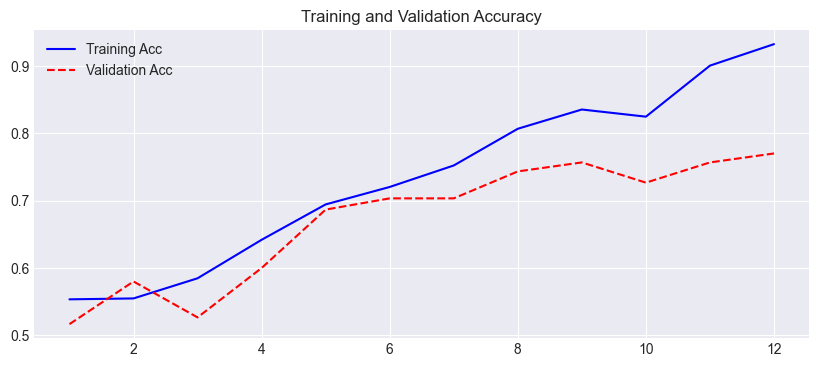

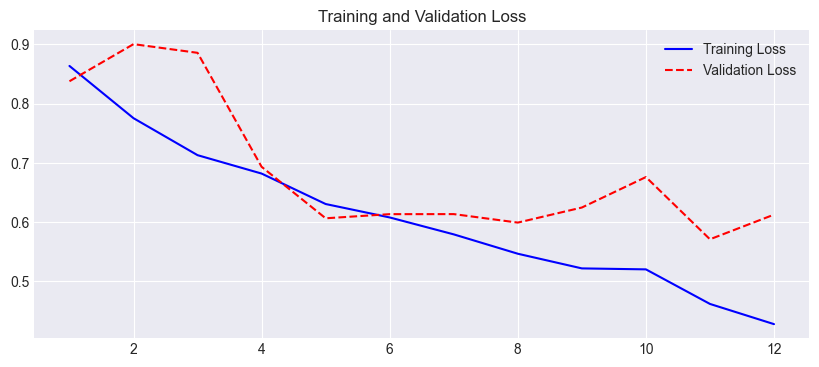

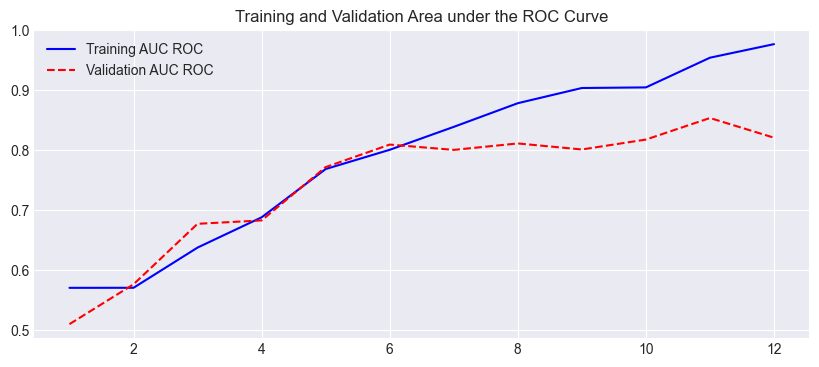

In [61]:
# -----------------------------------------------------------------------------------------------------------------
# Make the plot - Accuracy
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, accuracy, "b", label = "Training Acc")
plt.plot(epochs, val_accuracy, "r--", label = "Validation Acc")

# Adding title and legend
plt.title("Training and Validation Accuracy")
plt.legend()

# -----------------------------------------------------------------------------------------------------------------
# Make the plot - Loss
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, loss, "b", label = "Training Loss")
plt.plot(epochs, val_loss, "r--", label = "Validation Loss")

# Adding title and legend
plt.title("Training and Validation Loss")
plt.legend()


# -----------------------------------------------------------------------------------------------------------------
# Make the plot - AUC_ROC
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, AUC_ROC, "b", label = "Training AUC ROC")
plt.plot(epochs, val_AUC_ROC, "r--", label = "Validation AUC ROC")

# Adding title and legend
plt.title("Training and Validation Area under the ROC Curve")
plt.legend()

# Show the plots
plt.show()

In [62]:
# Print the metrics names
model_v_d154.metrics_names

['loss', 'accuracy', 'precision', 'recall', 'AUC_ROC']

## Load the Model - Test

In [63]:
# Load the model from a file 
model_test_load = load_model("logs_model/model_v_d154.h5")

## Evaluate using Confusion Matrix on Testing Files

In [64]:
# Prepare data from two different generators, to be fed into the model for testing
test_generator = double_generator(test_generator_cc, test_generator_mlo, bch_size)

In [65]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_auc_roc = model_v_d154.evaluate(test_generator)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC ROC: {test_auc_roc}")

26/26 [==============================] - 3s 96ms/step - loss: 0.5075 - accuracy: 0.8267 - precision: 0.8987 - recall: 0.7245 - AUC_ROC: 0.9243
Test Loss: 0.5074936747550964
Test Accuracy: 0.8267326951026917
Test Precision: 0.8987341523170471
Test Recall: 0.7244898080825806
Test AUC ROC: 0.924303412437439


In [66]:
# Make predictions
predictions_probs = model_v_d154.predict(test_generator)

# Print the first 10 predictions probabilities
print(predictions_probs[:10])

26/26 [==============================] - 3s 97ms/step
[[0.16434738]
 [0.09078767]
 [0.5546377 ]
 [0.16642666]
 [0.07631017]
 [0.04520831]
 [0.48026556]
 [0.54105866]
 [0.10548486]
 [0.0486212 ]]


In [67]:
# Create a predictions lists of True and False from the predictions probabilities 
predictions = predictions_probs > 0.5

# Print the first 10 predictions
print(predictions[:10])

[[False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]]


In [68]:
# Convert predictions to binary labels
predicted_labels = (predictions_probs > 0.5).astype(int)

In [69]:
# Get the true labels from the test generator
true_labels = []

for idx in range(len(test_generator)):
    _, labels = test_generator[idx]
    true_labels.extend(labels)

true_labels = np.array(true_labels)

In [70]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85       104
         1.0       0.90      0.72      0.80        98

    accuracy                           0.83       202
   macro avg       0.84      0.82      0.82       202
weighted avg       0.84      0.83      0.82       202



In [71]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
cm

array([[96,  8],
       [27, 71]], dtype=int64)

In [72]:
# Get class labels from the generator
class_labels = list(test_generator_cc.class_names)

# Show the class_labels
class_labels

['cancer', 'no_cancer']

## Confusion Matrix as a Heatmap

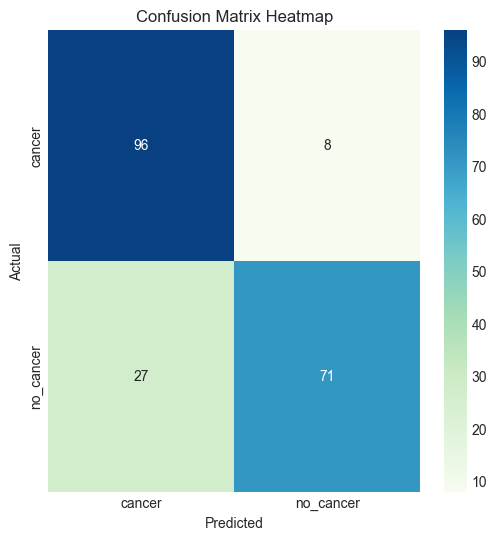

In [73]:
# Make the plot
plt.figure(figsize = (6, 6))

# Plotting
sns.heatmap(cm, 
            annot = True, 
            cmap = "GnBu", 
            fmt = "g", 
            xticklabels = class_labels, 
            yticklabels = class_labels)

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()